## Домашняя работа по курсу машинное обучение - Факультет экономических наук НИУ ВШЭ
### Задача бинарной классификации
Применение и оценка качества таких моделей как
- kNN
- DecisonTree
- RandomForest
- SGD Linear Classifier

## Данные


В этой домашней работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

## Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму в оценке модели на контроле. И наоборот, большой размер контрольной выборки ведет к менее шумной оценке качества, однако модели получаются менее точными.

Многие модели классификации получают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). Затем принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$y(x) = +1$,  если $\tilde{y}(x) \geq \theta$, $y(x) = -1$, если $\tilde{y}(x) < \theta$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC. Детального понимания принципов работы метрики AUC-ROC для выполнения лабораторной не требуется.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

## Задание

Прежде чем приступать к заданию, рекомендуем в начале прочитать его до конца.

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [64]:
import pandas as pd
df = pd.read_csv('data.adult.csv', na_values = "?")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "?". 

**(0.5 балла)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [268]:
display(df.isna().sum())
df.dropna(subset = ['workclass', 'occupation'], axis = 0, inplace = True)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 

 - Выделите целевую переменную (ту, которую мы хотим предсказывать) в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [66]:
y = df['>50K,<=50K'].apply(lambda x: 1 if x == '<=50K' else 0)
df.drop(['>50K,<=50K'], axis = 1, inplace = True)

In [269]:
Xnum = df[['age', 'fnlwgt', 'education-num',
       'capital-gain', 'capital-loss', 'hours-per-week']]
Xnum.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40


## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

**(1.5 балла)** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [49]:
# kNN — число соседей (n_neighbors)
search_kNN = GridSearchCV(
    KNeighborsClassifier(),
    param_grid={
        'n_neighbors': np.arange(1, 25)
    },
    cv=5,
    scoring = 'roc_auc'
)
search_kNN.fit(Xnum, y)
kNN_param = search_kNN.best_params_
kNN_sc = search_kNN.best_score_
print(kNN_param)
print(kNN_sc)

{'n_neighbors': 4}
0.6407160528708574


Text(0.5, 1.0, 'Динамика среднего качества в зависимости от кол-ва соседей')

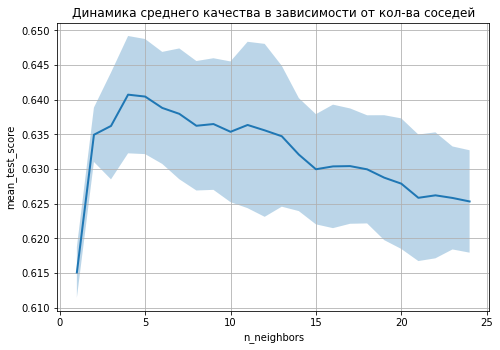

In [50]:
# график среднего качества
import matplotlib.pyplot as plt
df_sc = pd.DataFrame(search_kNN.cv_results_) # cтолб
y1 = df_sc.mean_test_score
x1 = np.arange(1, 25)

#график
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.grid()
axes.plot(x1, y1, lw = 2)

# дов интервал
yinter_up = df_sc.mean_test_score + 1.96*df_sc.std_test_score/5**(1/2)
yinter_low = df_sc.mean_test_score - 1.96*df_sc.std_test_score/5**(1/2)
axes.fill_between(x1,yinter_low, yinter_up, alpha = 0.3)


axes.set_ylabel('mean_test_score')
axes.set_xlabel('n_neighbors')
axes.set_title('Динамика среднего качества в зависимости от кол-ва соседей')

In [52]:
# DecisonTree — глубина дерева (max_depth)
search_DT = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid={
        'max_depth': np.arange(1, 20)
    },
    cv=5, scoring = 'roc_auc'
)
search_DT.fit(Xnum, y)
DT_param = search_DT.best_params_
DT_sc = search_DT.best_score_
print(DT_param)
print(DT_sc)

{'max_depth': 7}
0.8416906817151241


Text(0.5, 1.0, 'Динамика среднего качества в зависимости от max_depth')

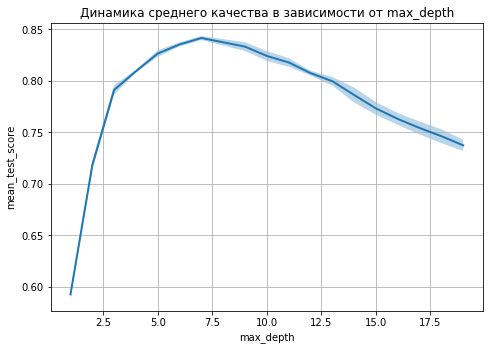

In [54]:
# график среднего качества
df_sc = pd.DataFrame(search_DT.cv_results_)
y1 = df_sc.mean_test_score
x1 = np.arange(1, 20)

#график
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.grid()
axes.plot(x1, y1, lw = 2)

# дов интервал
yinter_up = df_sc.mean_test_score + 1.96*df_sc.std_test_score/5**(1/2)
yinter_low = df_sc.mean_test_score - 1.96*df_sc.std_test_score/5**(1/2)
axes.fill_between(x1,yinter_low, yinter_up, alpha = 0.3)

axes.set_ylabel('mean_test_score')
axes.set_xlabel('max_depth')
axes.set_title('Динамика среднего качества в зависимости от max_depth')

In [95]:
loss = ['hinge', 'log', 'modified_huber',
        'squared_hinge',
        'perceptron']

search_SGD = GridSearchCV(
    SGDClassifier(),
    param_grid={
        'loss': loss
    },
    cv=5, scoring = 'roc_auc'
    
)
search_SGD.fit(Xnum, y)
SGD_param = search_SGD.best_params_
SGD_sc = search_SGD.best_score_
print(SGD_param)
print(SGD_sc)

{'loss': 'perceptron'}
0.6202435848011406


Что вы можете сказать о получившихся графиках?

**(1 балл)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

In [204]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
# на семинаре сказали, что можно пройтись по кол-ву деревьев и посмотреть,
# метрика перестанет сильно возрастать 
sc = []
n_estimators = range(1, 101)
for n in tqdm(n_estimators):
    model = RandomForestClassifier(n_estimators = n)
    sc.append(cross_val_score(model, Xnum, y, scoring='roc_auc', cv=5).mean())


100%|██████████| 100/100 [06:53<00:00,  4.13s/it]


In [209]:
model = RandomForestClassifier(n_estimators = 100)
cross_val_score(model, Xnum, y, scoring='roc_auc', cv=5).mean()

0.8184480346000754

Text(0.5, 1.0, 'Динамика roc_auc на кросс-валидации в зависимости от кол-ва деревьев')

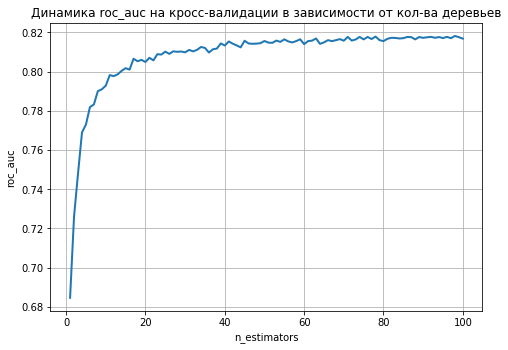

In [210]:
import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.grid()
axes.plot(n_estimators, sc, lw = 2)
axes.set_ylabel('roc_auc')
axes.set_xlabel('n_estimators')
axes.set_title('Динамика roc_auc на кросс-валидации в зависимости от кол-ва деревьев')

In [ ]:
# Можно взять 60 деревьев, так как после этого метрика почти не возрастет

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на сами признаки.

**(0.5 балла)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*.

Text(0.5, 1.0, 'capital-gain')

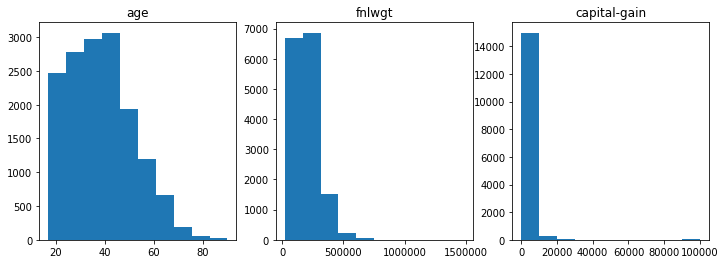

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].hist(df['age'])
axes[0].set_title('age')

axes[1].hist(df['fnlwgt'])
axes[1].set_title('fnlwgt')

axes[2].hist(df['capital-gain'])
axes[2].set_title('capital-gain')

**(0.5 балла)** Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

Данные имеют разные ед измерения, очень разные по масштабу. Возраст не превышает 100, а fnlwgt может быть больше 100 000. Повлияет на KNeighborsClassifier, так как вклад в расстояние у признаков разный

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 
**(1 балл)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогичо пункту выше.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xstand = scaler.fit_transform(Xnum)
Xstand

# сделаем ф-цию, которая будет подбираться оптимальные параметры для модели и выводить их
def Grid(model, params):
    search = GridSearchCV(model, param_grid =  params, cv=5, scoring = 'roc_auc')
    search.fit(Xstand, y)
    print('best_score:', search.best_score_, 'best_params:', search.best_params_)

In [99]:
Grid(KNeighborsClassifier(), {'n_neighbors':np.arange(1, 25)})

best_score: 0.8300767816668997 best_params: {'n_neighbors': 24}


In [26]:
Grid(DecisionTreeClassifier(), {'max_depth': np.arange(1, 20)})

best_score: 0.8410754200182119 best_params: {'max_depth': 7}


In [97]:
loss = ['hinge', 'log', 'modified_huber',
        'squared_hinge',
        'perceptron']

Grid(SGDClassifier(), {'loss': loss})

best_score: 0.8197866555894968 best_params: {'loss': 'log'}


In [224]:
# Также посмотрим на метрику для случайного леса на кросс-валидации
RandomForestClassifier(n_estimators = 60)
cross_val_score(RandomForestClassifier(n_estimators = 60), X = Xstand, y = y,
                scoring = 'roc_auc', cv = 5).mean()

0.8162356760196234

Изменилось ли качество у некоторых алгоритмов?
- У метода ближ соседей значительно изменилось качество и изменился оптимальный гипер параметр.
Изначально было {'n_neighbors': 4} 0.6407160528708574. Это связано с тем, что без масштабирования вклад признака зависит от размерности (расстояние до соседа)
- На DecisionTree не повлияло. Предыдущий результат {'n_neighbors': 4} 0.6407160528708574
- SGDClassifier - тоже значительно улучшил резултат изначально было примерно 0.61
- RandomForestClassifier почти не изменилось

**(1,5 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

In [252]:
# для сравнения времени подбора параметров
from datetime import datetime

In [254]:
a = datetime.now()
metric = ['euclidean', 'manhattan', 'chebyshev'] #подберем метрики, которые не требуют доп параметров
search_kNN = GridSearchCV(
    KNeighborsClassifier(),
    param_grid={
        'n_neighbors': np.arange(1, 25), 'metric': metric},
    cv=5,
    scoring = 'roc_auc'
)
search_kNN.fit(Xstand, y)
kNN_param = search_kNN.best_params_
kNN_sc = search_kNN.best_score_
print(kNN_param)
print(kNN_sc)
b = datetime.now()
time_KNN = b - a

{'metric': 'manhattan', 'n_neighbors': 23}
0.8317313177060924


In [265]:
a = datetime.now()
Grid(DecisionTreeClassifier(), {'max_depth': np.arange(1, 25), 
                                'criterion':['gini', 'entropy']})
b = datetime.now()
time_DT = b - a

best_score: 0.8420799416078225 best_params: {'criterion': 'entropy', 'max_depth': 8}


In [259]:
a = datetime.now()
Grid(SGDClassifier(), {'loss': ['hinge', 'log', 'modified_huber','squared_hinge','perceptron'],
                        'penalty': ["l2", "l1", "elasticnet"]})
b = datetime.now()
time_SGD = b - a

best_score: 0.8248428752926943 best_params: {'loss': 'log', 'penalty': 'l1'}


In [263]:
a = datetime.now()
Grid(RandomForestClassifier(n_estimators = 60), {'max_features': ['auto', 'sqrt', 'log2'],
                                'criterion':['gini', 'entropy']})
b = datetime.now()
time_RF = b - a

best_score: 0.8168697774022095 best_params: {'criterion': 'entropy', 'max_features': 'log2'}


Какой из алгоритмов имеет наилучшее качество? 
- DecisionTreeClassifier() c средним рок-аук 0.84

**(0.5 балла)** Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

In [266]:
print("KNeighborsClassifier", time_KNN)
print("DecisionTreeClassifier", time_DT)
print("SGDClassifier", time_SGD)
print("RandomForestClassifier", time_RF)

KNeighborsClassifier 0:01:56.451003
DecisionTreeClassifier 0:00:09.554080
SGDClassifier 0:00:04.910594
RandomForestClassifier 0:00:30.653906


По результам видно, что KNN подбирает параметры намного дольше. Предполагаю, что это свзяно 
с большим кол-во соседеней, расстояние до которых приходится рассчитывать

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**(0.5 балла)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [75]:
cat_features_mask = (df.dtypes == "object").values
Xcat = pd.get_dummies(df[df.columns[cat_features_mask]], drop_first = True)
Xcat.head()
Xcat.shape

(15347, 50)

Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем добавлять их и подбирать заново оптимальные гиперпараметры. 

**(0.5 балла)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [79]:
import numpy as np
Xnew = np.concatenate((Xstand, Xcat.to_numpy()), axis=1)
print(Xnew.shape) # можно проверить, что массивы правильно склеиились

(15347, 56)

In [235]:
KNN_cross_val = cross_val_score(KNeighborsClassifier(metric =  'manhattan', n_neighbors = 23), X = Xnew, y = y,
                scoring = 'roc_auc', cv = 5).mean()
print(KNN_cross_val)

0.8881440793644927


In [233]:
DT_cross_val = cross_val_score(DecisionTreeClassifier(criterion = 'entropy', max_depth = 8), X = Xnew, y = y,
                scoring = 'roc_auc', cv = 5).mean()
print(DT_cross_val)

0.8902492682566893


In [232]:
SGD_cross_val = cross_val_score(SGDClassifier(loss= 'log', penalty = 'l2'), X = Xnew, y = y,
                scoring = 'roc_auc', cv = 5).mean()
print(SGD_cross_val)

0.9016495278947977


In [230]:
RF_cross_val = cross_val_score(RandomForestClassifier(n_estimators = 60, 
                                       criterion = 'entropy',
                                       max_features = 'auto'),
                X = Xnew, y = y, scoring = 'roc_auc', cv = 5).mean()
print(RF_cross_val)

0.8991052645158838


Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?
- Да, отличается, теперь наилучший классификатор это SGDClassifier, а на 2 месту случайный лес

## Смешивание моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказани путем смешивания подобных разных моделей. Давайте посмотрим, действительно ли это дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**(1 балл)** Подберите по сетке от 0 до 1 $\alpha$ для этого классификатора с помощью 5-Fold CV и постройте график качества в зависимости от $\alpha$ (аналогичный графику в разделе "Обучение классификаторов и оценка качества"). Дал ли этот подход прирост к качеству по сравнению с моделями ранее?

In [236]:
clf1 = SGDClassifier(loss= 'log', penalty = 'l2')
clf2 = RandomForestClassifier(n_estimators = 60, 
                                       criterion = 'entropy',
                                       max_features = 'auto')

In [237]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[ ('clf1', clf1), ('clf2', clf2)], 
                        voting='soft')

In [238]:
# зададим веса моделей, перебирая альфы и после можно подать парметр weights в gridsearch
weights = [[i, 1 - i] for i in np.arange(0, 1, 0.1)]

In [239]:
search = GridSearchCV(eclf1,
                      param_grid = {'weights': weights},
                      scoring = 'roc_auc', 
                      cv = 5)
search.fit(Xnew, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=VotingClassifier(estimators=[('clf1',
                                                     SGDClassifier(alpha=0.0001,
                                                                   average=False,
                                                                   class_weight=None,
                                                                   early_stopping=False,
                                                                   epsilon=0.1,
                                                                   eta0=0.0,
                                                                   fit_intercept=True,
                                                                   l1_ratio=0.15,
                                                                   learning_rate='optimal',
                                                                   loss='log',
                                                    

In [243]:
print(search.best_params_)
print(search.best_score_)

{'weights': [0.30000000000000004, 0.7]}
0.9079911279210257


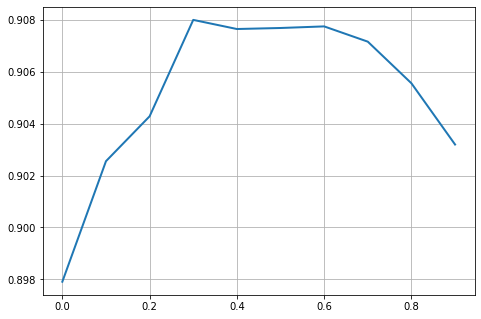

In [242]:
# Гра
df_sc = pd.DataFrame(search.cv_results_)
y1 = df_sc.mean_test_score
x1 = np.arange(0, 1, 0.1)

#график
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.grid()
axes.plot(x1, y1, lw = 2)

- Качество стало чуть выше, метрика на кросс валидации (сv = 5) у SGD была 0.9016
У новой модели 0.90799

## Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей хотелось бы сравнить их между собой. Для этого можно построить "ящик с усами" (диаграму размаха). Для этого можно воспользоваться библиотекой [matplotlib](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) или [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

**(1 балл)** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели выберете тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха (все классификаторы должны быть изображены на одном графике).
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [207]:
KNn = cross_val_score(KNeighborsClassifier(metric =  'manhattan', n_neighbors = 24), X = Xnew, y = y,
                scoring = 'roc_auc', cv = 5)

In [208]:
DT = cross_val_score(DecisionTreeClassifier(criterion = 'entropy', max_depth = 8), X = Xnew, y = y,
                scoring = 'roc_auc', cv = 5)

In [247]:
SGD = cross_val_score(SGDClassifier(loss= 'log', penalty = 'l2'), X = Xnew, y = y,
                scoring = 'roc_auc', cv = 5)

In [249]:
RF = cross_val_score(RandomForestClassifier(n_estimators = 60, 
                                       criterion = 'entropy',
                                       max_features = 'auto'),
                X = Xnew, y = y, scoring = 'roc_auc', cv = 5)

In [245]:
model = VotingClassifier(estimators=[ ('clf1', clf1), ('clf2', clf2)], 
                        voting='soft', weights = [0.3, 0.7])
Voitig = cross_val_score(model, X = Xnew, y = y,
                scoring = 'roc_auc', cv = 5)


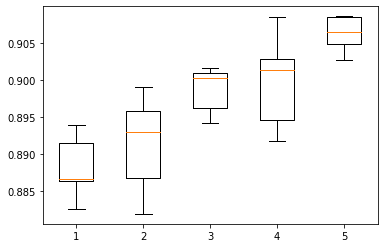

In [251]:
plt.boxplot([KNn,
             DT,
             RF,
            SGD, 
            Voitig])
plt.show()

На графике размаха видно, что наилучший резултат roc_auc по кросс_валидации дала смешанная модель (SGD + RandomFores), хоть и отличие от SGD отдельно не такое большое.

Изнчално, подбор мастабирование данных значительно повлияло только на KNN и SGD. В KNN это связано с тем, что без масшибирования у разных признаков разный вклад в расстояние до соседа.
Также в KNN самый долгий подбор параметров, так как приходится на считай большое кол-во соседей для каждого объекта.